In [4]:
import main as main

In [1]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from db import dbctrl as dbc
import string
from wordcloud import WordCloud
import re

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [5]:
# main.run_all()

'Program has sucessfully scraped and saved the data.'

In [13]:
al_data = urlopen('https://www.al.com/')
al_soup = BeautifulSoup(al_data, 'html.parser')
articles = al_soup.find_all('article')
# regex_pattern = r'\dh\sago'
titles = []
    
for i in articles:
    titles.append(i.text)
    
titles = [re.sub('\d+h\sago$', '',i).lstrip().rstrip() for i in titles]    
titles = [i for i in set(titles)]

In [2]:
# titles = dbc.grab_titles()

In [9]:
# [re.sub("\dh$", '', i) for i in titles]

['Alabama adds 754 confirmed coronavirus casesThe daily update on coronavirus cases in Alabama.',
 'Whitmire: LGBTQ charter school rejection is unacceptable',
 'Trump to announce Supreme Court pick on Friday or SaturdayTrump disparaged reports that Ruth Bader Ginsburg had told her granddaughter it was her wish that a replacement justice not be confirmed until the ...',
 'Alabama reserve cornerback suffers arm injuryHe suffered the injury last week.',
 'The 2020 Alabama football depth chart',
 'An update on Joey Gatewood heading into Kentucky-Auburn',
 'Check out Amari Cooper’s circus catch for Cowboy',
 "AL.com's SEC Insider: Alabama 2020 Season PreviewSEC Insider: Alabama 2020 Season Preview\n- The wildest offseason ever?\n- Offense: Moving on from Tua\n- Defense: Back to the standard?",
 'Incredible last-second scramble play leads to Hillcrest-Tuscaloosa 34-28 win over WetumpkaHillcrest-Tuscaloosa trailed Wetumpka 30-28 with 2.9 seconds left on its own 41-yard line when coach Sam Ada

In [15]:
stop_words = set(stopwords.words('english')) | set(string.punctuation)

In [16]:
cleaned_titles = []
for i in titles:
    word_tokens = word_tokenize(i)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
            
    cleaned_titles.append(filtered_sentence)

In [37]:
cleaned_words = []
for titles in cleaned_titles:
    for words in titles:
        cleaned_words.append(re.sub(r'\dh','', words))

In [39]:
listToStr = ' '.join([str(elem) for elem in cleaned_words])

In [41]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(listToStr)

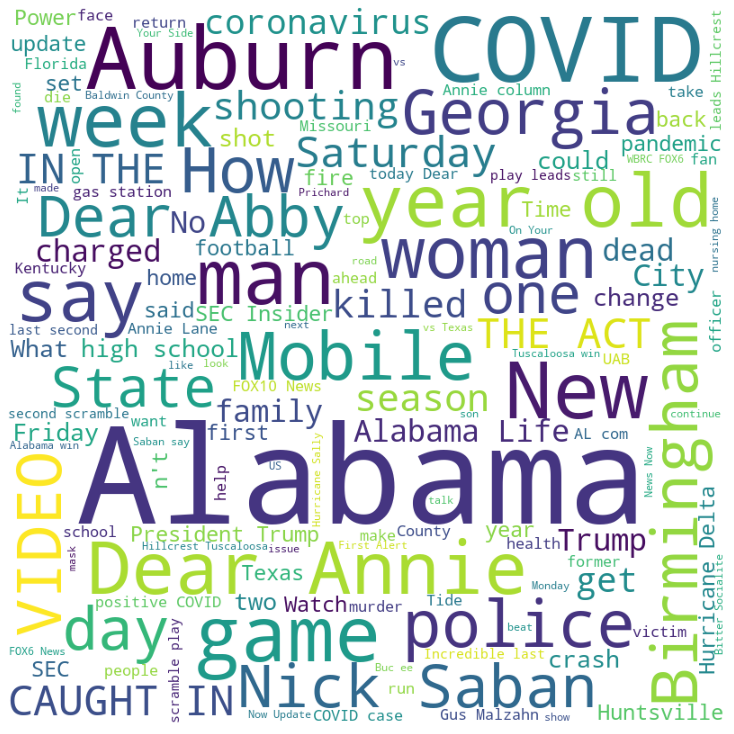

In [43]:
plt.figure(figsize = (20, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Observing the Data that we have collected

In [72]:
meta_alabama = 0
alabama_titles = []
football_count = 0
football_titles = []
covid_count = 0
covid_titles = []
trump_count = 0
trump_titles = []
saban_count = 0
saban_titles = []
police_count = 0
police_titles = []
crime_count = 0
crime_titles = []
misc_titles = []
for i in set(all_titles):
    if 'Alabama' in i:
        meta_alabama +=1
        alabama_titles.append(i)
    elif 'football' in i:
        football_count += 1
        football_titles.append(i)
    elif 'Trump' in i:
        trump_count += 1
        trump_titles.append(i)
    elif 'Saban' in i:
        saban_count += 1
        saban_titles.append(i)
    elif 'police' in i:
        police_count += 1
        police_titles.append(i)
    else:
        misc_titles.append(i)

In [66]:
len(set(all_titles))

2085

In [73]:
meta_alabama

351

In [74]:
football_count

50

In [75]:
saban_count

28

In [76]:
trump_count

93

In [77]:
police_count

44

In [61]:
### There will be a few list that will make up the entire sports spectrum
### For example, there will be football words, baseball words, basketball words, etc.

# football_positions = ['QB','RB','FB','WR','OT','C','G','TE','DE','DT', 'LB', 'OLB', 'S', 'CB', 'FS']

# football_words = ['Saban', 'ESPN', 'Alabama football', 'Tide', 'Tide', 'football', 'NFL', 'Auburn football',
#                  'Nick Saban', 'cornerback', 'vs.', 'players', 'games', 'College Football']

# crime_words = ['murder', 'shooting', 'killed', 'dead', 'injured', 'homicide', 'gunfire', 'injured', 'beaten', 'death',
#               'arrested', 'abuse', 'charged']